# Problem 8

In [113]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

training_data = pd.read_csv('./penguins_train.csv')
test_data = pd.read_csv('./penguins_test.csv')

In [ ]:
# task a
ad = training_data[training_data['species'] == 'Adelie']
nad = training_data[training_data['species'] == 'notAdelie']

# means and stds
print('For Adelie')
print('val\tbill_length_mm\tbill_depth_mm\tflipper_length_mm\tbody_mass_g')
print('mean\t', ad['bill_length_mm'].mean(), '\t', ad['bill_depth_mm'].mean(), '\t', ad['flipper_length_mm'].mean(), '\t', ad['body_mass_g'].mean())
print('std\t', ad['bill_length_mm'].std(), '\t', ad['bill_depth_mm'].std(), '\t', ad['flipper_length_mm'].std(), '\t', ad['body_mass_g'].std())

print('For notAdelie')
print('val\tbill_length_mm\tbill_depth_mm\tflipper_length_mm\tbody_mass_g')
print('mean\t', nad['bill_length_mm'].mean(), '\t', nad['bill_depth_mm'].mean(), '\t', nad['flipper_length_mm'].mean(), '\t', nad['body_mass_g'].mean())
print('std\t', nad['bill_length_mm'].std(), '\t', nad['bill_depth_mm'].std(), '\t', nad['flipper_length_mm'].std(), '\t', nad['body_mass_g'].std())

# class probabilities
print('Class probabilities')
prob_adelie = (len(ad)+1)/(2+len(training_data))
prob_nadelie = (len(nad)+1)/(2+len(training_data))
print('prob_adelie', prob_adelie)
print('prob_nadelie', prob_nadelie)

In [135]:
# task c
import scipy.stats

# ignore it, focus on norms
mean_x1_a = ad['bill_length_mm'].mean()
mean_x2_a = ad['bill_depth_mm'].mean()
mean_x3_a = ad['flipper_length_mm'].mean()
mean_x4_a = ad['body_mass_g'].mean()

mean_x1_na = nad['bill_length_mm'].mean()
mean_x2_na = nad['bill_depth_mm'].mean()
mean_x3_na = nad['flipper_length_mm'].mean()
mean_x4_na = nad['body_mass_g'].mean()

std_x1_a = ad['bill_length_mm'].std()
std_x2_a = ad['bill_depth_mm'].std()
std_x3_a = ad['flipper_length_mm'].std()
std_x4_a = ad['body_mass_g'].std()

std_x1_na = nad['bill_length_mm'].std()
std_x2_na = nad['bill_depth_mm'].std()
std_x3_na = nad['flipper_length_mm'].std()
std_x4_na = nad['body_mass_g'].std()

prior_adelie = (len(ad)+1)/(2+len(training_data))
prior_notadelie = (len(nad)+1)/(2+len(training_data))
norm_x1_a = scipy.stats.norm(mean_x1_a, std_x1_a)
norm_x2_a = scipy.stats.norm(mean_x2_a, std_x2_a)
norm_x3_a = scipy.stats.norm(mean_x3_a, std_x3_a)
norm_x4_a = scipy.stats.norm(mean_x4_a, std_x4_a)

norm_x1_na = scipy.stats.norm(mean_x1_na, std_x1_na)
norm_x2_na = scipy.stats.norm(mean_x2_na, std_x2_na)
norm_x3_na = scipy.stats.norm(mean_x3_na, std_x3_na)
norm_x4_na = scipy.stats.norm(mean_x4_na, std_x4_na)

def classify(row):
    P = prior_adelie*norm_x1_a.pdf(row['bill_length_mm'])*norm_x2_a.pdf(row['bill_depth_mm'])*norm_x3_a.pdf(row['flipper_length_mm'])*norm_x4_a.pdf(row['body_mass_g'])
    P = P/(P + prior_notadelie*norm_x1_na.pdf(row['bill_length_mm'])*norm_x2_na.pdf(row['bill_depth_mm'])*norm_x3_na.pdf(row['flipper_length_mm'])*norm_x4_na.pdf(row['body_mass_g']))
    if P >= 0.5:
        return 'Adelie'
    else:
        return 'notAdelie'

right = 0
for row in test_data.iterrows():
    res = classify(row[1])
    print(row[1]['species'])

bill_length_mm         39.2
bill_depth_mm          18.6
flipper_length_mm       190
body_mass_g            4250
species              Adelie
Name: 0, dtype: object
bill_length_mm         41.5
bill_depth_mm          18.5
flipper_length_mm       201
body_mass_g            4000
species              Adelie
Name: 1, dtype: object
bill_length_mm         39.0
bill_depth_mm          17.1
flipper_length_mm       191
body_mass_g            3050
species              Adelie
Name: 2, dtype: object
bill_length_mm         37.5
bill_depth_mm          18.9
flipper_length_mm       179
body_mass_g            2975
species              Adelie
Name: 3, dtype: object
bill_length_mm         38.8
bill_depth_mm          17.2
flipper_length_mm       180
body_mass_g            3800
species              Adelie
Name: 4, dtype: object
bill_length_mm         35.0
bill_depth_mm          17.9
flipper_length_mm       192
body_mass_g            3725
species              Adelie
Name: 5, dtype: object
bill_length_mm        

# Problem 9

Model coefficients
[[ 1.57894316e+00 -9.79289548e-01  1.01773624e-03  5.10530046e-02]] [0.0364156]
Accuracy on train data
1.0
Accuracy on test data
0.9866666666666667
Penguin number 10 in training dataset has linear response = 2.6439457287011408 bill_depth_mm          16.6
bill_length_mm         36.5
body_mass_g          2850.0
flipper_length_mm     181.0
Name: 9, dtype: float64


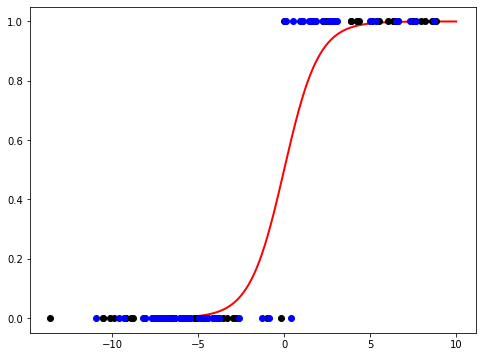

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.special import expit, logit

def calculate_x(coef, intercept, x):
    toret = []
    for _, row in x.iterrows():
        t = coef[0]*row['bill_depth_mm']+coef[1]*row['bill_length_mm']+coef[2]*row['body_mass_g']+coef[3]*row['flipper_length_mm'] + intercept
        toret.append(t)
    return toret

training_data = pd.read_csv('./penguins_train.csv')
test_data = pd.read_csv('./penguins_test.csv')

X_train = training_data[training_data.columns.difference(['species'])]
y_train = training_data['species'].apply(lambda x: 1 if x=='Adelie' else 0)

X_test = test_data[test_data.columns.difference(['species'])]
y_test = test_data['species'].apply(lambda x: 1 if x=='Adelie' else 0)

model = LogisticRegression().fit(X_train, y_train)
print('Model coefficients')
print(model.coef_, model.intercept_)

print('Accuracy on train data')
print(model.score(X_train, y_train))

print('Accuracy on test data')
print(model.score(X_test, y_test))

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(calculate_x(model.coef_[0], model.intercept_[0], X_train), y_train, color="black", zorder=20)
plt.scatter(calculate_x(model.coef_[0], model.intercept_[0], X_test), y_test, color="blue", zorder=20)

x_curve = np.linspace(-5, 10, 300)

loss = expit(x_curve).ravel()
plt.plot(x_curve, loss, color="red", linewidth=2)

print('Penguin number 10 in training dataset has linear response =', calculate_x(model.coef_[0], model.intercept_[0], X_train)[9], X_train.iloc[9])